In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'
caminho_2021 = '../dados/obitos-2021.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)
dados_2021 = pd.read_csv(caminho_2021)

print(f'2019 {dados_2019.shape}')
print(f'2020 {dados_2020.shape}')
print(f'2021 {dados_2021.shape}')


2019 (12382, 6)
2020 (14911, 6)
2021 (5323, 6)


In [7]:
dados_2019.head()


,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [8]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
5044,RS,COVID,OUTROS_SERVICOS_SAUDE,40 - 49,F,10
3487,PI,PNEUMONIA,HOSPITAL,30 - 39,F,7
10315,BA,INSUFICIENCIA_RESPIRATORIA,OUTRO,80 - 89,M,12
1175,DF,OUTRAS,OUTROS_SERVICOS_SAUDE,10 - 19,F,1
3012,DF,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,30 - 39,F,1


In [10]:
print(len(dados_2019['uf'].unique()))
print(len(dados_2020['uf'].unique()))
print(len(dados_2021['uf'].unique()))

27
27
27


In [12]:
print(dados_2019["tipo_doenca"].unique())
print(dados_2020["tipo_doenca"].unique())
print(dados_2021["tipo_doenca"].unique())

['OUTRAS' 'INDETERMINADA' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA'
 'SEPTICEMIA' 'SRAG' 'COVID']
['OUTRAS' 'COVID' 'INDETERMINADA' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA'
 'SEPTICEMIA' 'SRAG']
['OUTRAS' 'COVID' 'INSUFICIENCIA_RESPIRATORIA' 'PNEUMONIA' 'SEPTICEMIA'
 'INDETERMINADA' 'SRAG']


In [20]:
print(dados_2019.info())
print(dados_2020.info())
print(dados_2021.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12382 entries, 0 to 12381
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12382 non-null  object
 1   tipo_doenca   12382 non-null  object
 2   local_obito   12382 non-null  object
 3   faixa_etaria  12382 non-null  object
 4   sexo          12380 non-null  object
 5   total         12382 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 580.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            14911 non-null  object
 1   tipo_doenca   14911 non-null  object
 2   local_obito   14911 non-null  object
 3   faixa_etaria  14911 non-null  object
 4   sexo          14910 non-null  object
 5   total         14911 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 699.1+ KB
Non

In [13]:
print(len(dados_2020["tipo_doenca"].unique()))
print(len(dados_2021["tipo_doenca"].unique()))
print(len(dados_2019["tipo_doenca"].unique()))

7
7
7


In [19]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
total_obitos_2021 = dados_2021.groupby('tipo_doenca').sum()

print(total_obitos_2019)
print(total_obitos_2020)
print(total_obitos_2021)


                             total
tipo_doenca                       
COVID                            1
INDETERMINADA                 6988
INSUFICIENCIA_RESPIRATORIA  100579
OUTRAS                      660548
PNEUMONIA                   226324
SEPTICEMIA                  175508
SRAG                          1498
                             total
tipo_doenca                       
COVID                       195533
INDETERMINADA                 9706
INSUFICIENCIA_RESPIRATORIA   98859
OUTRAS                      689583
PNEUMONIA                   181915
SEPTICEMIA                  162713
SRAG                         16546
                            total
tipo_doenca                      
COVID                       13513
INDETERMINADA                 376
INSUFICIENCIA_RESPIRATORIA   3342
OUTRAS                      25438
PNEUMONIA                    6314
SEPTICEMIA                   6232
SRAG                          616


In [24]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,195533.000000
INDETERMINADA,1.388952
INSUFICIENCIA_RESPIRATORIA,0.982899
OUTRAS,1.043956
PNEUMONIA,0.803781
SEPTICEMIA,0.927097
SRAG,11.045394


In [52]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    total_2021 = dados_2021.groupby('tipo_doenca').sum()

    lista = [int(total_2019.loc[causa]),int(total_2020.loc[causa]),int(total_2021.loc[causa])]

    dados = pd.DataFrame({'Total':lista,'Ano': [2019,2020,2021]})

    plt.figure(figsize =(8,6))
    sns.barplot(x = 'Ano', y='Total', data = dados)
    plt.title(f'Óbitos por {causa}')
    plt.show
    

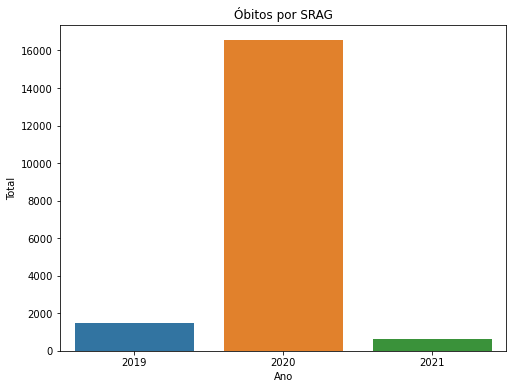

In [54]:
grafico_comparativo('SRAG')

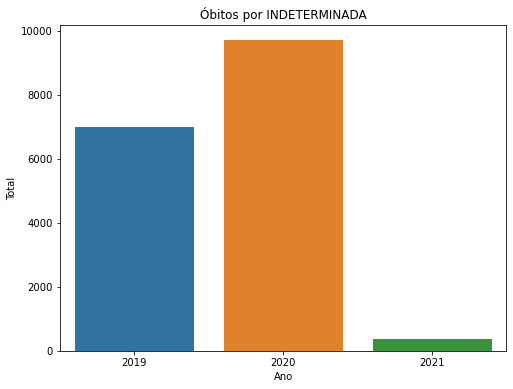

In [55]:
grafico_comparativo('INDETERMINADA')

In [53]:
total_obitos_2019.loc["SRAG"]

total    1498
Name: SRAG, dtype: int64